<a href="https://colab.research.google.com/github/bs3537/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Bhav_Copy_of_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


#####Your assignment - using the data from the prior module (congressional voting records):

Confidence Intervals:
Generate and numerically represent a confidence interval
Graphically (with a plot) represent the confidence interval
Interpret the confidence interval - what does it tell you about the data and its distribution?

In [49]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')
df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [50]:
df.shape

(434, 17)

In [0]:
df.replace('?', np.nan, inplace=True)

In [52]:
df.isnull().sum()

republican      0
n              12
y              48
n.1            11
y.1            11
y.2            15
y.3            11
n.2            14
n.3            15
n.4            22
y.4             7
?              20
y.5            31
y.6            25
y.7            17
n.5            28
y.8           104
dtype: int64

In [53]:
df.dropna()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
18,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
22,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
24,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,n,y,n,n,n,y,y
26,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
27,republican,y,n,n,y,y,n,y,y,y,n,n,y,y,y,n,y
28,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
29,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n


In [54]:
df.dtypes

republican    object
n             object
y             object
n.1           object
y.1           object
y.2           object
y.3           object
n.2           object
n.3           object
n.4           object
y.4           object
?             object
y.5           object
y.6           object
y.7           object
n.5           object
y.8           object
dtype: object

In [55]:
df2 = df.rename(columns = {'republican': 'party'})
df2.head()

,party,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
1,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [0]:
df3 = df2.dropna()

In [57]:
df3.head()

,party,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
18,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
22,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
24,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [0]:
cleanup_df3 = {"n":     {"y": 1, "n": 0}}

In [59]:
df3.replace(cleanup_df3, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [0]:
cleanup_df4 = {"y":     {"y": 1, "n": 0}}

In [61]:
df3.replace(cleanup_df4, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [62]:
df3.head()

,party,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
4,democrat,0,1,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,republican,0,1,n,y,y,y,n,n,n,n,n,y,y,y,n,y
18,democrat,1,1,y,n,n,n,y,y,y,n,y,n,n,n,y,y
22,democrat,1,1,y,n,n,n,y,y,y,n,n,n,n,n,y,y
24,democrat,1,0,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [63]:
df4 = df3['n']
df4.head()

4     0
7     0
18    1
22    1
24    1
Name: n, dtype: int64

In [64]:
df4.value_counts()

0    136
1     96
Name: n, dtype: int64

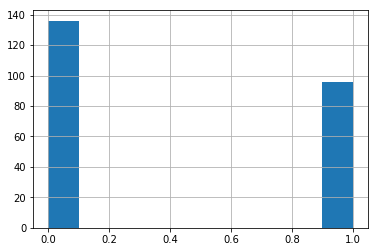

In [65]:
df4.hist()

In [66]:
df4.value_counts().mean()

116.0

In [0]:
from scipy import stats 

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(df4)
  mean = np.mean(df4)
  n = len(df4)
  stderr = stats.sem(df4)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean, mean - interval, mean + interval)

In [69]:
sample_size = 100
sample = df4.sample(sample_size)
sample.head()

255    0
73     1
47     1
4      0
147    0
Name: n, dtype: int64

In [70]:
sample_mean = sample.mean()
sample_std = np.std(sample, ddof=1)
print(sample_mean, sample_std)

0.48 0.502116731568678


In [71]:
standard_error = sample_std/np.sqrt(sample_size)
standard_error

0.050211673156867795

In [72]:
t = 1.984 # 95% confidence
(sample_mean, sample_mean - t*standard_error, sample_mean + t*standard_error)

(0.48, 0.38038004045677426, 0.5796199595432256)

In [73]:
confidence_interval(sample, confidence=0.95)


(0.41379310344827586, 0.34994610096505746, 0.47764010593149425)

###95% confidence intervals are 0.35 to 0.47 for the column which indicates handicapped infants

In [0]:
# plotting columns n and y, n = handicapped infants, y = water-project-cost-sharing

import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# working on handicapped infants column first

handicap = df4.values

In [75]:
handicap

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [0]:
handicap_mean = np.mean(handicap)

In [0]:
handicap_std = np.std(handicap)

In [0]:
# working on water project cost sharing colum
df6 = df3['y']

In [0]:
water = df6.values

In [80]:
water

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [0]:
water_mean = np.mean(water)

In [0]:
water_std = np.std(water)

In [0]:
# create lists for the plot

column_list = ['handicap', 'water']

In [0]:
x_pos = np.arange(len(column_list))

In [0]:
lists_mean = [handicap_mean, water_mean]

In [0]:
error = [handicap_std, water_std]

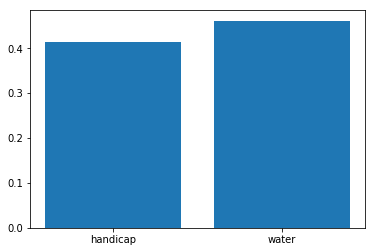

In [91]:
# build the bar plot showing means
import matplotlib.pyplot as plt
plt.bar(['handicap', 'water'],[handicap_mean, water_mean])
plt.show()

In [0]:
# Since 95% CI is approx 2 S.D, we can enter it as 2*standard deviation here.

yerr=[2*handicap_std, 2*water_std]

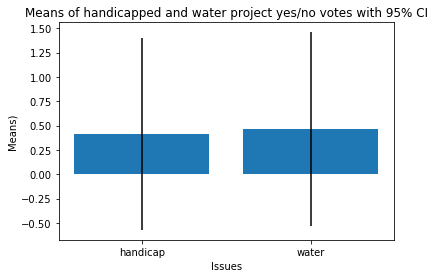

In [97]:
plt.bar(['handicap', 'water'],[handicap_mean, water_mean], yerr=[2*handicap_std, 2*water_std])
plt.xlabel('Issues')
plt.ylabel('Means)')
plt.title('Means of handicapped and water project yes/no votes with 95% CI')
plt.show()

### This dataset has yes/no votes as binary variables, an ideal dataset for t test and confidence intervals will be the one with numeric values for example with range between 100-1000. For example, the values of a certain test across 1000 patients between the test drug arm and the comparator arm.  

####Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

In [0]:
df6 = pd.read_csv('https://raw.githubusercontent.com/bs3537/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/master/module2-sampling-confidence-intervals-and-hypothesis-testing/titanic3%20(1).csv')

In [27]:
df6.head()

# The output is the titanic dataset which we have used in the DS precourse.

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [28]:
df6.shape

(1310, 14)

In [29]:
# isolating and cleaning the survived column

df7 = df6['survived']
df7.head()
# survived is a categorical variable which is already converted to binary variables in this titanic dataset, 1= survived, 0- did not survive.

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: survived, dtype: float64

In [30]:
df7.shape

(1310,)

In [31]:
df7.isnull().sum()

1

In [0]:
df8 = df7.dropna()

In [33]:
df8.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: survived, dtype: float64

In [34]:
# df8 is the data with cleaned values for survived status

df8.isnull().sum()

0

In [35]:
#isolating and cleaning the sex column which is also a categorical variable

df9 = df6['sex']
df9.head()

0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: object

In [36]:
df9.shape

(1310,)

In [37]:
df9.isnull().sum()

1

In [0]:
df10 = df9.dropna()

In [39]:
df10.head()

0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: object

In [40]:
df10.isnull().sum()

0

In [0]:
#df10 is the cleaned data containing the sex values coded as binary variables

In [42]:
# creating contigency table
contingency_table = pd.crosstab(df8, df10, margins=True)
contingency_table

sex,female,male,All
survived,,,
0.0,127,682,809
1.0,339,161,500
All,466,843,1309


In [43]:
# Chi Squared test using numpy

# Expected value calculation
row_sums = contingency_table.iloc[0:2, 2].values
col_sums = contingency_table.iloc[2, 0:2].values

print(row_sums)
print(col_sums)

[809 500]
[466 843]


In [44]:
total = contingency_table.loc['All','All']
total

1309

In [45]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 2)
[[288.00152788 520.99847212]
 [177.99847212 322.00152788]]


In [46]:
#Chi-Squared Statistic with Numpy

observed = pd.crosstab(df8, df10).values
print(observed.shape)
observed

(2, 2)


array([[127, 682],
       [339, 161]])

In [47]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

365.8869478111205

#### The chi-square statistic using numpy is 365.

In [48]:
# Chi Square Test using Scipy.

chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

363.6179084388249 4.589924936952945e-81 1 [[288.00152788 520.99847212]
 [177.99847212 322.00152788]]


####The Scipy function works well in finding relationship between fare and sex in this dataset.
####ChiSquared value = 1304.6, p value is significant since it is very low from above output, so we reject the null hypothesis that there is no relationship between sex and survival status. Using Chi Square test, we conclude that there is a relationship between sex and survival status.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)